In [29]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.constants import R

In [30]:

def get_traj(filename):
    """
    Load trajectory data from a file, extracting specific columns of numerical data.

    Parameters:
    filename (str): The file path from which to load data.

    Returns:
    numpy.ndarray: An array of trajectory data extracted from specified columns.
    """
    # Open the file in read mode
    with open(filename, 'r') as f:
        # Read all lines from the file
        lines = f.readlines()
        
        # Initialize a list to store the relevant data points
        data = []
        
        # Start processing from the 35th line, skipping header or initial data
        for line in lines[34:]:
            # Split each line into components based on spaces
            data_i = line.split(' ')
            # Extract the first and third elements and convert them to floats
            data.append([float(data_i[0]), float(data_i[2])])
    
    # Convert the list of data into a NumPy array for efficient numerical operations
    return np.array(data)

In [31]:
# Initialize an empty list to store trajectory data from multiple files
ramas = []

# Loop through a range of numbers to construct filenames dynamically
for i in range(1, 9):
    filename = f'replica_{i}.xvg'  # Dynamically create the filename
    try:
        # Load trajectory data from each file and append to the list
        traj_data = get_traj(filename)
        ramas.append(traj_data)
        print(f'Successfully loaded data from {filename}')
    except Exception as e:
        # Handle cases where the file may not be read properly
        print(f'Failed to load data from {filename}: {e}')

# Check if the list is not empty to avoid index errors
if ramas:
    # Print the shape of the array from the first file to check data structure
    print(f'Shape of the data from the first file: {ramas[0].shape}')
else:
    print('No trajectory data was loaded.')

Successfully loaded data from replica_1.xvg
Successfully loaded data from replica_2.xvg
Successfully loaded data from replica_3.xvg
Successfully loaded data from replica_4.xvg
Successfully loaded data from replica_5.xvg
Successfully loaded data from replica_6.xvg
Successfully loaded data from replica_7.xvg
Successfully loaded data from replica_8.xvg
Shape of the data from the first file: (50601, 2)


In [32]:

def get_landscape_from_trajs(rama, temp, bins=60):
    """
    Calculate the free energy landscape from Ramachandran plot data.
    
    Parameters:
    rama (numpy.ndarray): Array containing Ramachandran plot data, shape (N, 2).
    temp (float): Temperature in Kelvin.
    bins (int): Number of bins for histogramming the data.
    
    Returns:
    tuple: Tuple containing (x_centers, y_centers, energy.T), where `x_centers` and `y_centers`
    are arrays representing the bin centers, and `energy.T` is the transposed matrix of normalized free energy values.
    """
    
    # Calculate the 2D histogram for the Ramachandran plot data
    counts, x_edges, y_edges = np.histogram2d(rama[:, 0], rama[:, 1], bins=bins)
    
    # Handle zero counts to avoid log(0) which is undefined
    counts_with_zeros = counts.copy()
    counts_with_zeros[counts == 0] = np.nan  # Replace zeros with NaN
    
    # Calculate the free energy landscape from count data, avoiding log(0) by using counts_with_zeros
    energy = -np.log(counts_with_zeros) * 8.314 * temp * 0.001  # R (gas constant) in J/(mol*K)
    
    # Normalize energy by subtracting the minimum energy value to set it to zero
    min_energy = np.nanmin(energy)
    if np.isfinite(min_energy):  # Check if min_energy is finite
        energy -= min_energy
    
    # Compute the center of each bin in x and y directions
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    
    return x_centers, y_centers, energy.T

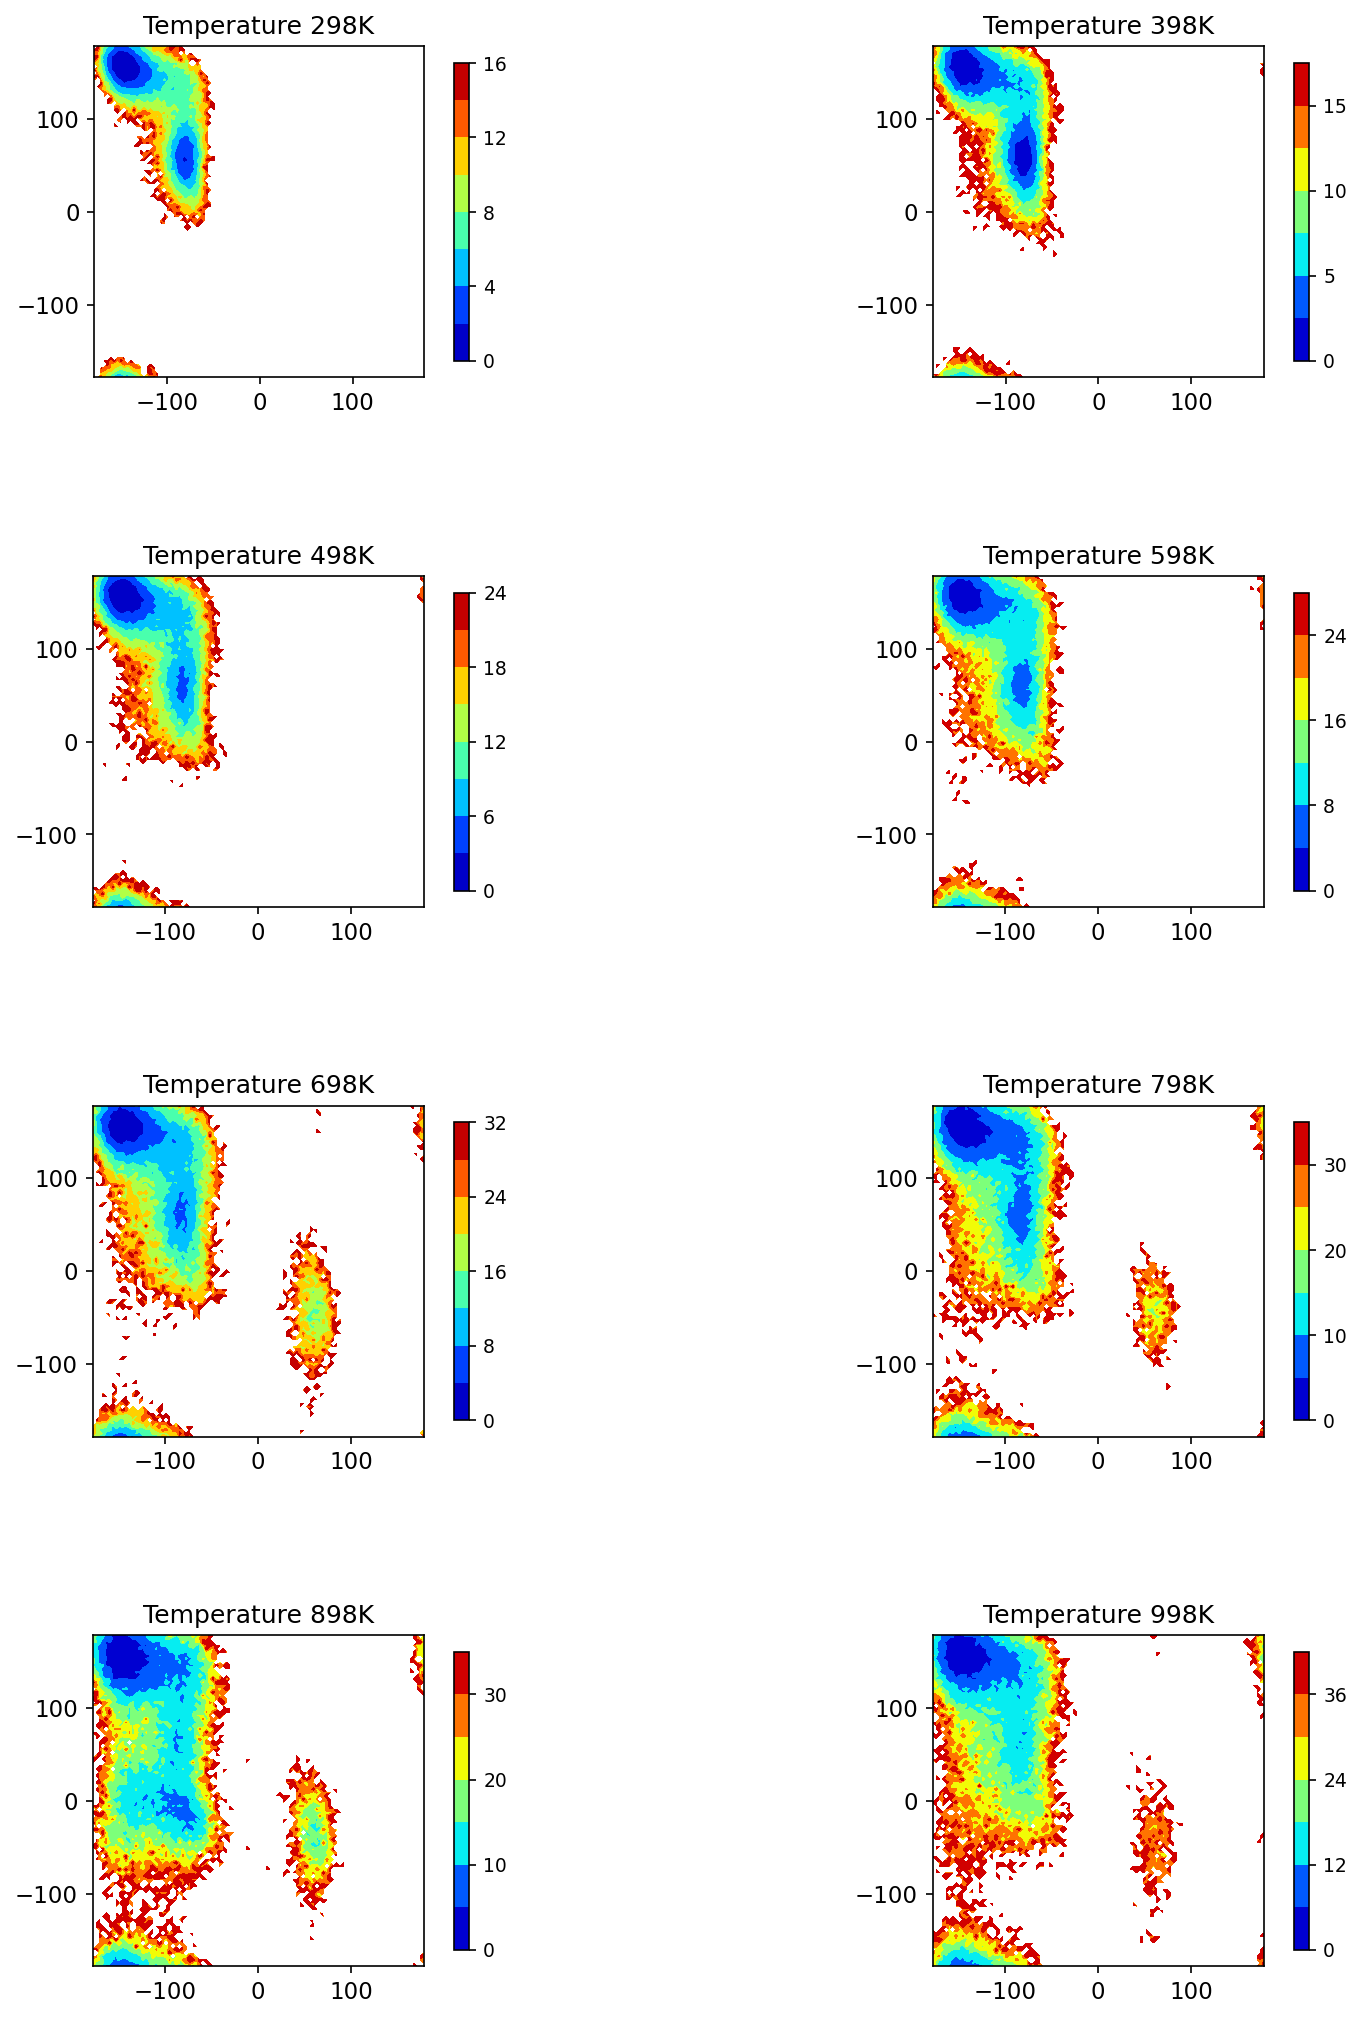

In [33]:

# Increasing figure size for better spacing and clarity
fig, axs = plt.subplots(4, 2, figsize=(12, 16), dpi=150)  # Adjust figsize as needed
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.6)  # Adjust spacing

temperatures = range(298, 999, 100)

for i in range(4):
    for j in range(2):
        idx = int(2 * i + j)
        x_center, y_center, energy = get_landscape_from_trajs(ramas[idx], temperatures[idx], bins=100)
        contour = axs[i, j].contourf(x_center, y_center, energy, cmap='jet')

        axs[i, j].set_title(f'Temperature {temperatures[idx]}K', fontsize=12)  # Reduced font size
        axs[i, j].set_aspect('equal')
        axs[i, j].tick_params(axis='both', labelsize=11)  # Reduced font size
        
        cbar = plt.colorbar(contour, ax=axs[i, j], shrink=0.9)  # Adjust shrink factor as needed
        cbar.ax.tick_params(labelsize=9)  # Reduced font size
        cbar.ax.locator_params(nbins=5)

plt.show()  # Display the plot